In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [21]:
class Swarm():
	"""
	Stores and handles wolf pack history and other details
	"""

	def __init__(self):
		self.__Positions = []
		self.__Lead = []

	def _set_Lead(self, Lead):
		"""
		Setter function for Lead wolf
		"""

		self.__Lead = Lead

	def _points(self, wolves):
		"""
		Setter function for wolf pack history
		"""

		self.__Positions.append([list(wolf) for wolf in wolves])

	def get_wolves(self):
		"""Returns a history of all wolves of the algorithm (return type: list)"""

		return self.__Positions

	def get_Lead(self):
		"""Return the Lead wolf position of algorithm (return type: list)"""

		return list(self.__Lead)

In [22]:
class Wpa(Swarm):
	"""
	Wolf Pack Search Alorithm
	"""

	def __init__(self, n, function, lower, upper, dimension, iteration):
		"""
		parameters:-

		n: number of wolves (type: int)
		function: test function (type: function)
		lower: lower limits for plot axes (type: int)
		upper: upper limits for plot axes (type: int)
		dimension: space dimension (type: int)
		iteration: number of iterations (type: int)
		"""

		super(Wpa, self).__init__()

		"""
		Initialization
		"""
		self.__wolves = np.random.uniform(lower, upper, (n, dimension))		# releasing wolves at random positions
		self._points(self.__wolves)											# recording pack initial positions
		alpha, beta, delta = self.__get_abd(n, function)					# assigning fittest 3 wolves

		Lead = alpha									# assigning Lead wolf

		"""
		Scouting and Besieging
		"""
		for t in range(iteration):						# maximum number of repetitions

			a = 2 - 2 * t / iteration					# parameter that decides step size (linear, from 2 to 0)

			# pack behaviour under alpha wolf
			r1 = np.random.random((n, dimension))
			r2 = np.random.random((n, dimension))
			A1 = 2 * r1 * a - a							# Parameter deciding converging nature of pack
			C1 = 2 * r2									# weight bias of prey's movement

			# pack behaviour under beta wolf
			r1 = np.random.random((n, dimension))
			r2 = np.random.random((n, dimension))
			A2 = 2 * r1 * a - a
			C2 = 2 * r2

			# pack behaviour under delta wolf
			r1 = np.random.random((n, dimension))
			r2 = np.random.random((n, dimension))
			A3 = 2 * r1 * a - a
			C3 = 2 * r2

			# relative change of state of pack (under alpha, beta, delta)
			Dalpha = abs(C1 * alpha - self.__wolves)
			Dbeta = abs(C2 * beta - self.__wolves)
			Ddelta = abs(C3 * delta - self.__wolves)

			# pack state update (under alpha, beta, delta)
			X1 = alpha - A1 * Dalpha
			X2 = beta - A2 * Dbeta
			X3 = delta - A3 * Ddelta

			self.__wolves = (X1 + X2 + X3) / 3						# averaging updated pack states (under alpha, beta, delta)

			self.__wolves = np.clip(self.__wolves, lower, upper)	# clipping off values beyond bounds
			self._points(self.__wolves)								# storing pack state into history

			alpha, beta, delta = self.__get_abd(n, function)		# updating alpha, beta, delta wolves
			if function(alpha) < function(Lead):
				Lead = alpha										# updating Lead wolf

		"""
		population renewing
		"""
		self._set_Lead(Lead)									# setting Lead wolf
		alpha, beta, delta = self.__get_abd(n, function)		# setting alpha, beta, delta wolves


	# function to find the fittest 3 wolves (assigned as alpha, beta, delta)
	def __get_abd(self, n, function):

		result = []
		fitness = [(function(self.__wolves[i]), i) for i in range(n)]
		fitness.sort()											# sorting wolves according to their fitness

		for i in range(3):										# selecting fittest 3 wolves
			result.append(self.__wolves[fitness[i][1]])

		return result

In [23]:
def ackley_function(x):
    return -exp(-sqrt(0.5*sum([i**2 for i in x]))) - exp(0.5*sum([cos(i) for i in x])) + 1 + exp(1)

Optimal solution: [1.6710254642557562e-16, -1.5501081364439978e-16]


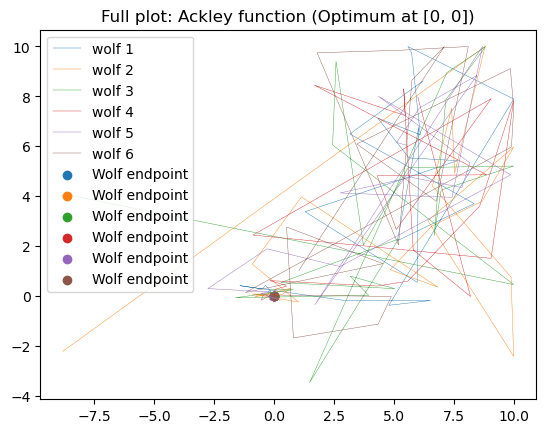

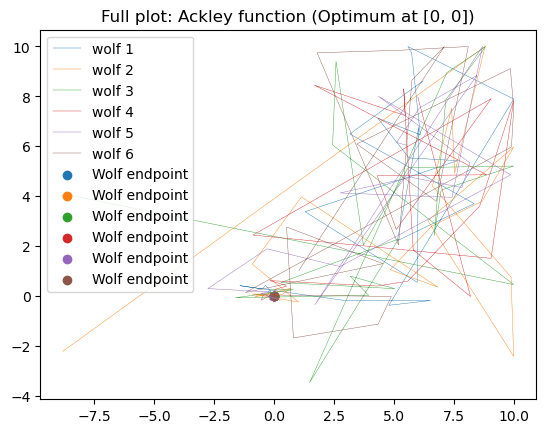

In [24]:
results = Wpa(6, ackley_function, -10, 10, 2, 1000);		# testing Ackley function
print("Optimal solution:", results.get_Lead());	
# plt.plot(xaxis,res)
# printing optimal solution
for k in range(2):											# plotting full plot first, then zoomed plot
	for i in range(len(results.get_wolves()[0])):							# plotting wolf tracks
		plt.plot([x[i][0] for x in results.get_wolves()], [x[i][1] for x in results.get_wolves()], label="wolf "+str(i+1), linewidth=0.3);
	for x in results.get_wolves()[len(results.get_wolves()) - 1]:			# plotting wolf endpoints
		plt.scatter(x[0], x[1], label="Wolf endpoint");
		plt.title("Full plot: Ackley function (Optimum at [0, 0])");
	plt.legend();
	plt.show();